In [6]:
import pandas as pd

# Load the data
fake_news = pd.read_csv('Fake.csv')
non_fake_news = pd.read_csv('True.csv')

# Add a label column
fake_news['label'] = 'fake'
non_fake_news['label'] = 'non-fake'

In [7]:
# Combine the dataframes
combined_df = pd.concat([fake_news, non_fake_news], ignore_index=True)

In [8]:
df = combined_df

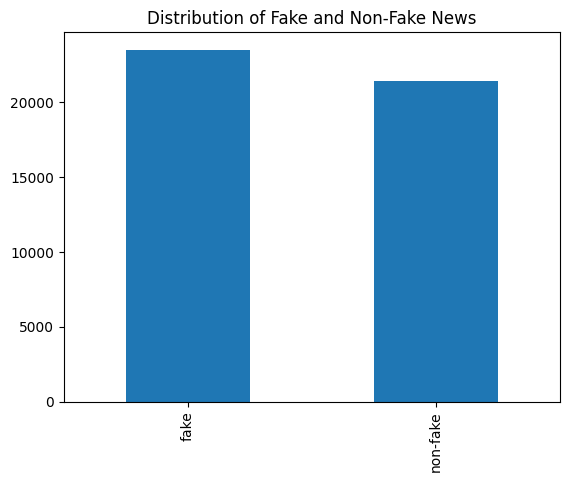

In [4]:
import matplotlib.pyplot as plt

# Assuming the dataframe is named 'df'
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and Non-Fake News')
plt.show()

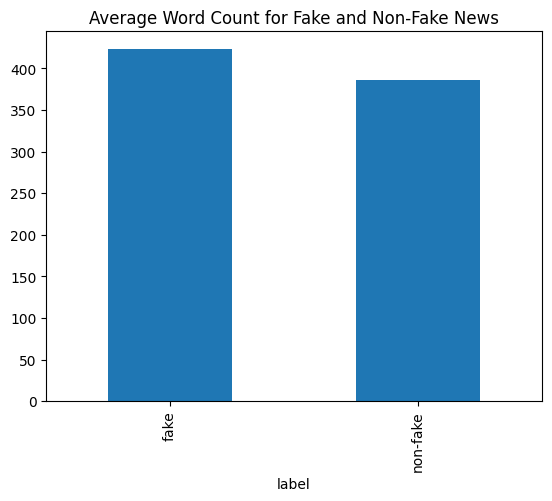

In [5]:
# Creating a new column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Plotting the average word count for fake and non-fake news
df.groupby('label')['word_count'].mean().plot(kind='bar')
plt.title('Average Word Count for Fake and Non-Fake News')
plt.show()

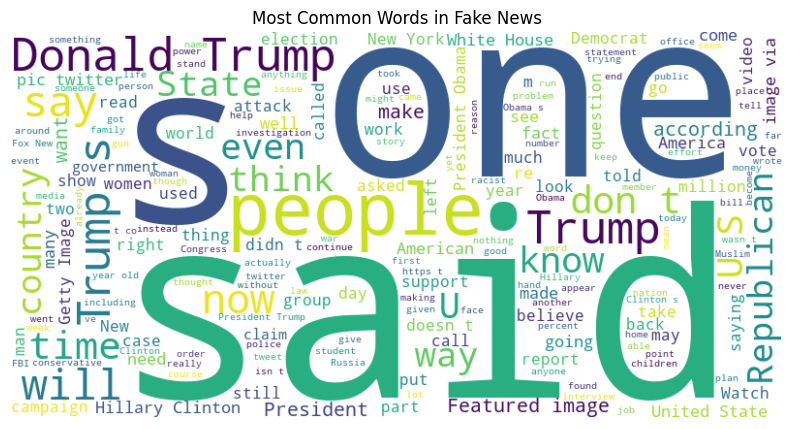

In [6]:
from wordcloud import WordCloud

# Filtering the fake news
fake_text = ' '.join(df[df['label'] == 'fake']['text'].tolist())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Displaying the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News')
plt.show()


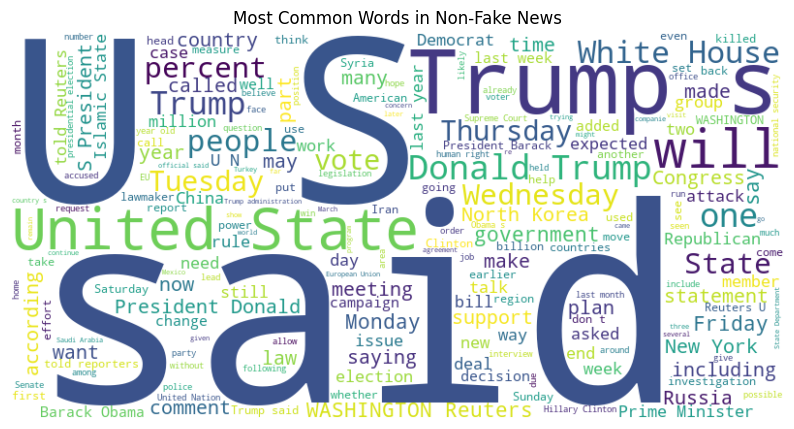

In [7]:
from wordcloud import WordCloud

# Filtering the fake news
fake_text = ' '.join(df[df['label'] == 'non-fake']['text'].tolist())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Displaying the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Non-Fake News')
plt.show()


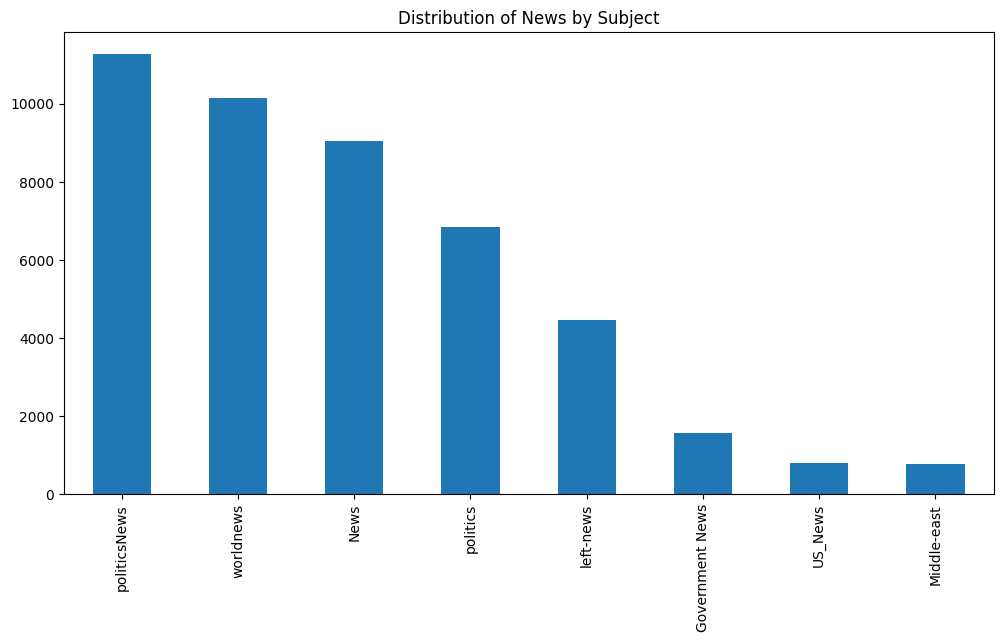

In [8]:
plt.figure(figsize=(12, 6))
df['subject'].value_counts().plot(kind='bar')
plt.title('Distribution of News by Subject')
plt.show()


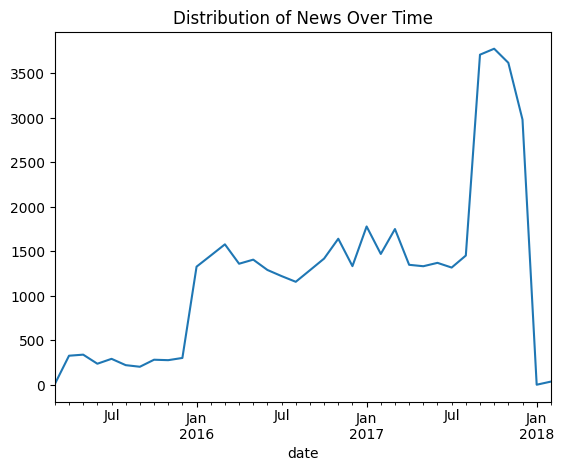

In [9]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by month and plot the distribution
df.resample('M', on='date').size().plot()
plt.title('Distribution of News Over Time')
plt.show()

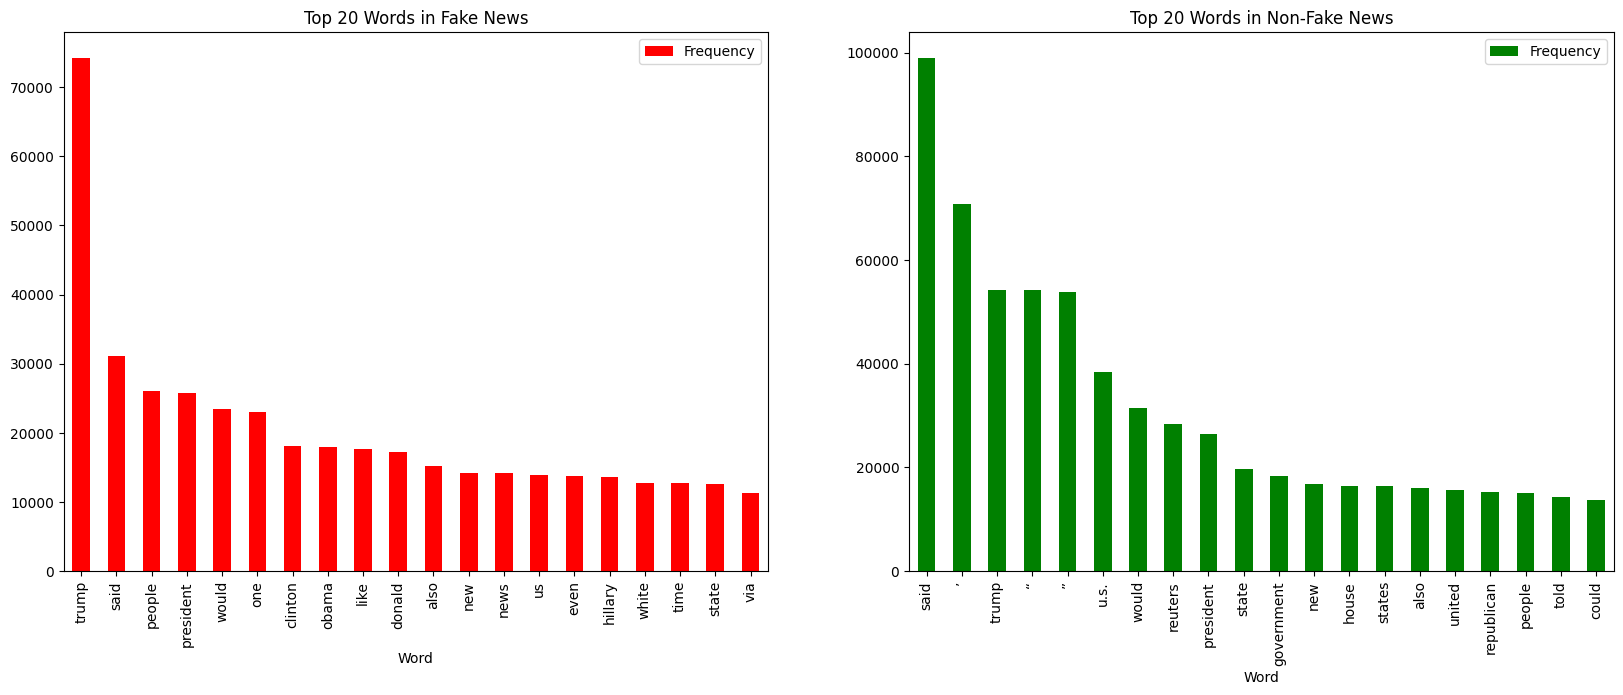

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Tokenization, removing stopwords and punctuation
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

# Get the most common words for fake news
fake_tokens = preprocess(' '.join(df[df['label'] == 'fake']['text'].tolist()))
fake_word_freq = Counter(fake_tokens)

# Get the most common words for non-fake news
non_fake_tokens = preprocess(' '.join(df[df['label'] == 'non-fake']['text'].tolist()))
non_fake_word_freq = Counter(non_fake_tokens)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
pd.DataFrame(fake_word_freq.most_common(20), columns=['Word', 'Frequency']).set_index('Word').plot(kind='bar', ax=ax[0], color='red')
pd.DataFrame(non_fake_word_freq.most_common(20), columns=['Word', 'Frequency']).set_index('Word').plot(kind='bar', ax=ax[1], color='green')
ax[0].set_title('Top 20 Words in Fake News')
ax[1].set_title('Top 20 Words in Non-Fake News')
plt.show()

In [11]:
from nltk.tokenize import word_tokenize

df['tokenized_text'] = df['text'].apply(word_tokenize)

In [12]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [13]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word.lower() for word in x])

In [14]:
import string

df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word.isalpha()])

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreyashindurkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

# Lemmatization
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stemming
df['stemmed_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])


In [17]:
# Checking for missing data
missing_data = df.isnull().sum()

# If there's missing data in the 'text' column, we can drop those rows or impute
df = df.dropna(subset=['text'])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for demonstration
tfidf_matrix = vectorizer.fit_transform(df['text'])


In [19]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['label'].apply(lambda x: 1 if x == 'fake' else 0) # Assuming label is 'fake' or 'non-fake'

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [21]:
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from sklearn.utils import parallel_backend

In [22]:
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.5, 0.7, 1.0],
#     'colsample_bytree': [0.5, 0.7, 1.0],
#     'n_estimators': [100, 200]
# }


In [31]:
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200]
}


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Initialize XGBoost classifier
clf = xgb.XGBClassifier()

# Set up RandomizedSearchCV
# n_iter specifies the number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='accuracy')

In [35]:
# Predict on the test set
y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


Accuracy: 0.9983667409057164
F1 Score: 0.9984456690688145
Confusion Matrix:
[[3191    6]
 [   5 3533]]


# GPT2

In [4]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

model_name = "gpt2"
model = GPT2ForSequenceClassification.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from transformers import AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch

# Setup GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Split the data
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['label'].map({'fake': 0, 'non-fake': 1}), test_size=0.2, random_state=42)

In [10]:
train_texts = train_texts.tolist()
test_texts = test_texts.tolist()
train_labels = train_labels.tolist()
test_labels = test_labels.tolist()

In [11]:
# Set padding token
tokenizer.pad_token = tokenizer.eos_token

# Then proceed with tokenization
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, return_tensors='pt', max_length=512)

In [12]:
import torch
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [13]:
from tqdm import tqdm

In [14]:
train_dataset = FakeNewsDataset(train_encodings, train_labels)

# Setup DataLoader, Optimizer
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|                                                  | 0/2245 [00:00<?, ?it/s]/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_15529/2611845113.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
  0%|                                                  | 0/2245 [00:06<?, ?it/s]


AssertionError: Cannot handle batch sizes > 1 if no padding token is defined.

In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
test_dataset = FakeNewsDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16)

# Evaluation loop
model.eval()
total = 0
correct = 0
for batch in test_loader:
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")
